# 311 Data Exploration

For this project I wanted to look at 311 data from New York City to see how response times to 311 calls vary by borough. I was initially interested in looking at the data longitudinally, but ran into numerous challenges in doing so. The 311 dataset made available by the city is well over 10 gigabytes. I made several attempts to load the data into Jupyter on my personal machine. Dask offered a limited set of tools and I was unable to do the types of visualizations that I was interested in with batching. I was able to find a tool available through New York City's open data initiative that allowed me to download data that had been subset. I chose to focus on 311 calls from 2019 so that the results and graphical displays would be most relevant and up to date. 311 calls reflect the daily struggles of New Yorkers. The service provides a catchall outlet for locals to make non-criminal complaints.

To narrow the scope of the project I investigated mostly 311 calls that were classified by the 311 operator as being assigned to the NYPD. This allowed for a finer level of discrimination.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt 
from datetime import datetime, date, time
import seaborn as sns
%matplotlib inline

## Data Import

To speed processing datatypes were specified on import. Pandas struggled to infer datatypes from the CSV due to mixed entries in the original data.

A "Response Time" column was created for each borough. To investigate how the city responds to 311 calls differently in different parts of the city, an assumption was made. The dataset includes "Created Date" and "Closed Date" variables. On the assumption that the city closes calls promptly when the issue has been resolved and does not close them without properly investigating or responding, the response time was taken to be the difference between the above times.

Some of the resulting values were negative. This is apparently an error, though the source of the error is unclear. Rows with zero or negative values for the response time variable were dropped.

In [2]:
df = pd.read_csv('311_Service_Requests_from_2019_NYPD.csv', header=0,
                 sep=',', parse_dates=['Created Date', 'Closed Date'],
                 dayfirst=True, index_col='Unique Key', 
                 dtype={'Unique Key': int, 'Created Date': object, 
                             'Closed Date': object, 'Agency': object,
                             'Agency Name': object, 'Complaint Type': object,
                             'Descriptor': object, 'Location Type': object,
                             'Incident Zip': object, 'Incident Address': object,
                             'Street Name': object, 'Cross Street 1': object,
                             'Cross Street 2': object, 'Intersection Street 1': object,
                             'Intersection Street 2': object, 'Address Type': object,
                             'City': object, 'Landmark': object, 'Facility Type': object,
                             'Status': object, 'Due Date': object, 'Resolution Description': object,
                             'Resolution Action Updated Date': object, 'Community Board': object,
                             'BBL': float, 'Borough': object,
                             'X Coordinate (State Plane)': float,
                             'Y Coordinate (State Plane)': float, 'Open Data Channel Type': object,
                             'Park Facility Name': object, 'Park Borough': object,
                             'Vehicle Type': object, 'Taxi Company Borough': object,
                             'Taxi Pick Up Location': object, 'Bridge Highway Name': object,
                             'Bridge Highway Direction': object, 'Road Ramp': object,
                             'Bridge Highway Segment': object, 'Latitude': float,
                             'Longitude': float, 'Location': object})

df['Response Time'] = df['Closed Date'] - df['Created Date']

In [3]:
df_nypd = df[df['Agency']=='NYPD']
df_nypd = df_nypd[df_nypd['Response Time'].astype(int)>0]

df_bronx = df_nypd[df_nypd['Borough']=='BRONX']
df_bronx = df_bronx[df_bronx['Response Time'].astype(int)>0]

df_queens = df_nypd[df_nypd['Borough']=='QUEENS']
df_queens = df_queens[df_queens['Response Time'].astype(int)>0]

df_brooklyn = df_nypd[df_nypd['Borough']=='BROOKLYN']
df_brooklyn = df_brooklyn[df_brooklyn['Response Time'].astype(int)>0]

df_manhattan = df_nypd[df_nypd['Borough']=='MANHATTAN']
df_manhattan = df_manhattan[df_manhattan['Response Time'].astype(int)>0]

df_staten_island = df_nypd[df_nypd['Borough']=='STATEN ISLAND']
df_staten_island = df_staten_island[df_staten_island['Response Time'].astype(int)>0]

## Initial Plot

The data are tagged with Latitude and Longitude values. This made plotting a straightforward exercise. An initial glance at the plot seems to highlight parks and track population centers in the city. Staten Island, for example, appears faded when compared with her sister boroughs, due primarily to it's relative population sparsity.

(-74.28026402453763, -73.67395026148378, 40.47816511607478, 40.93410763576078)

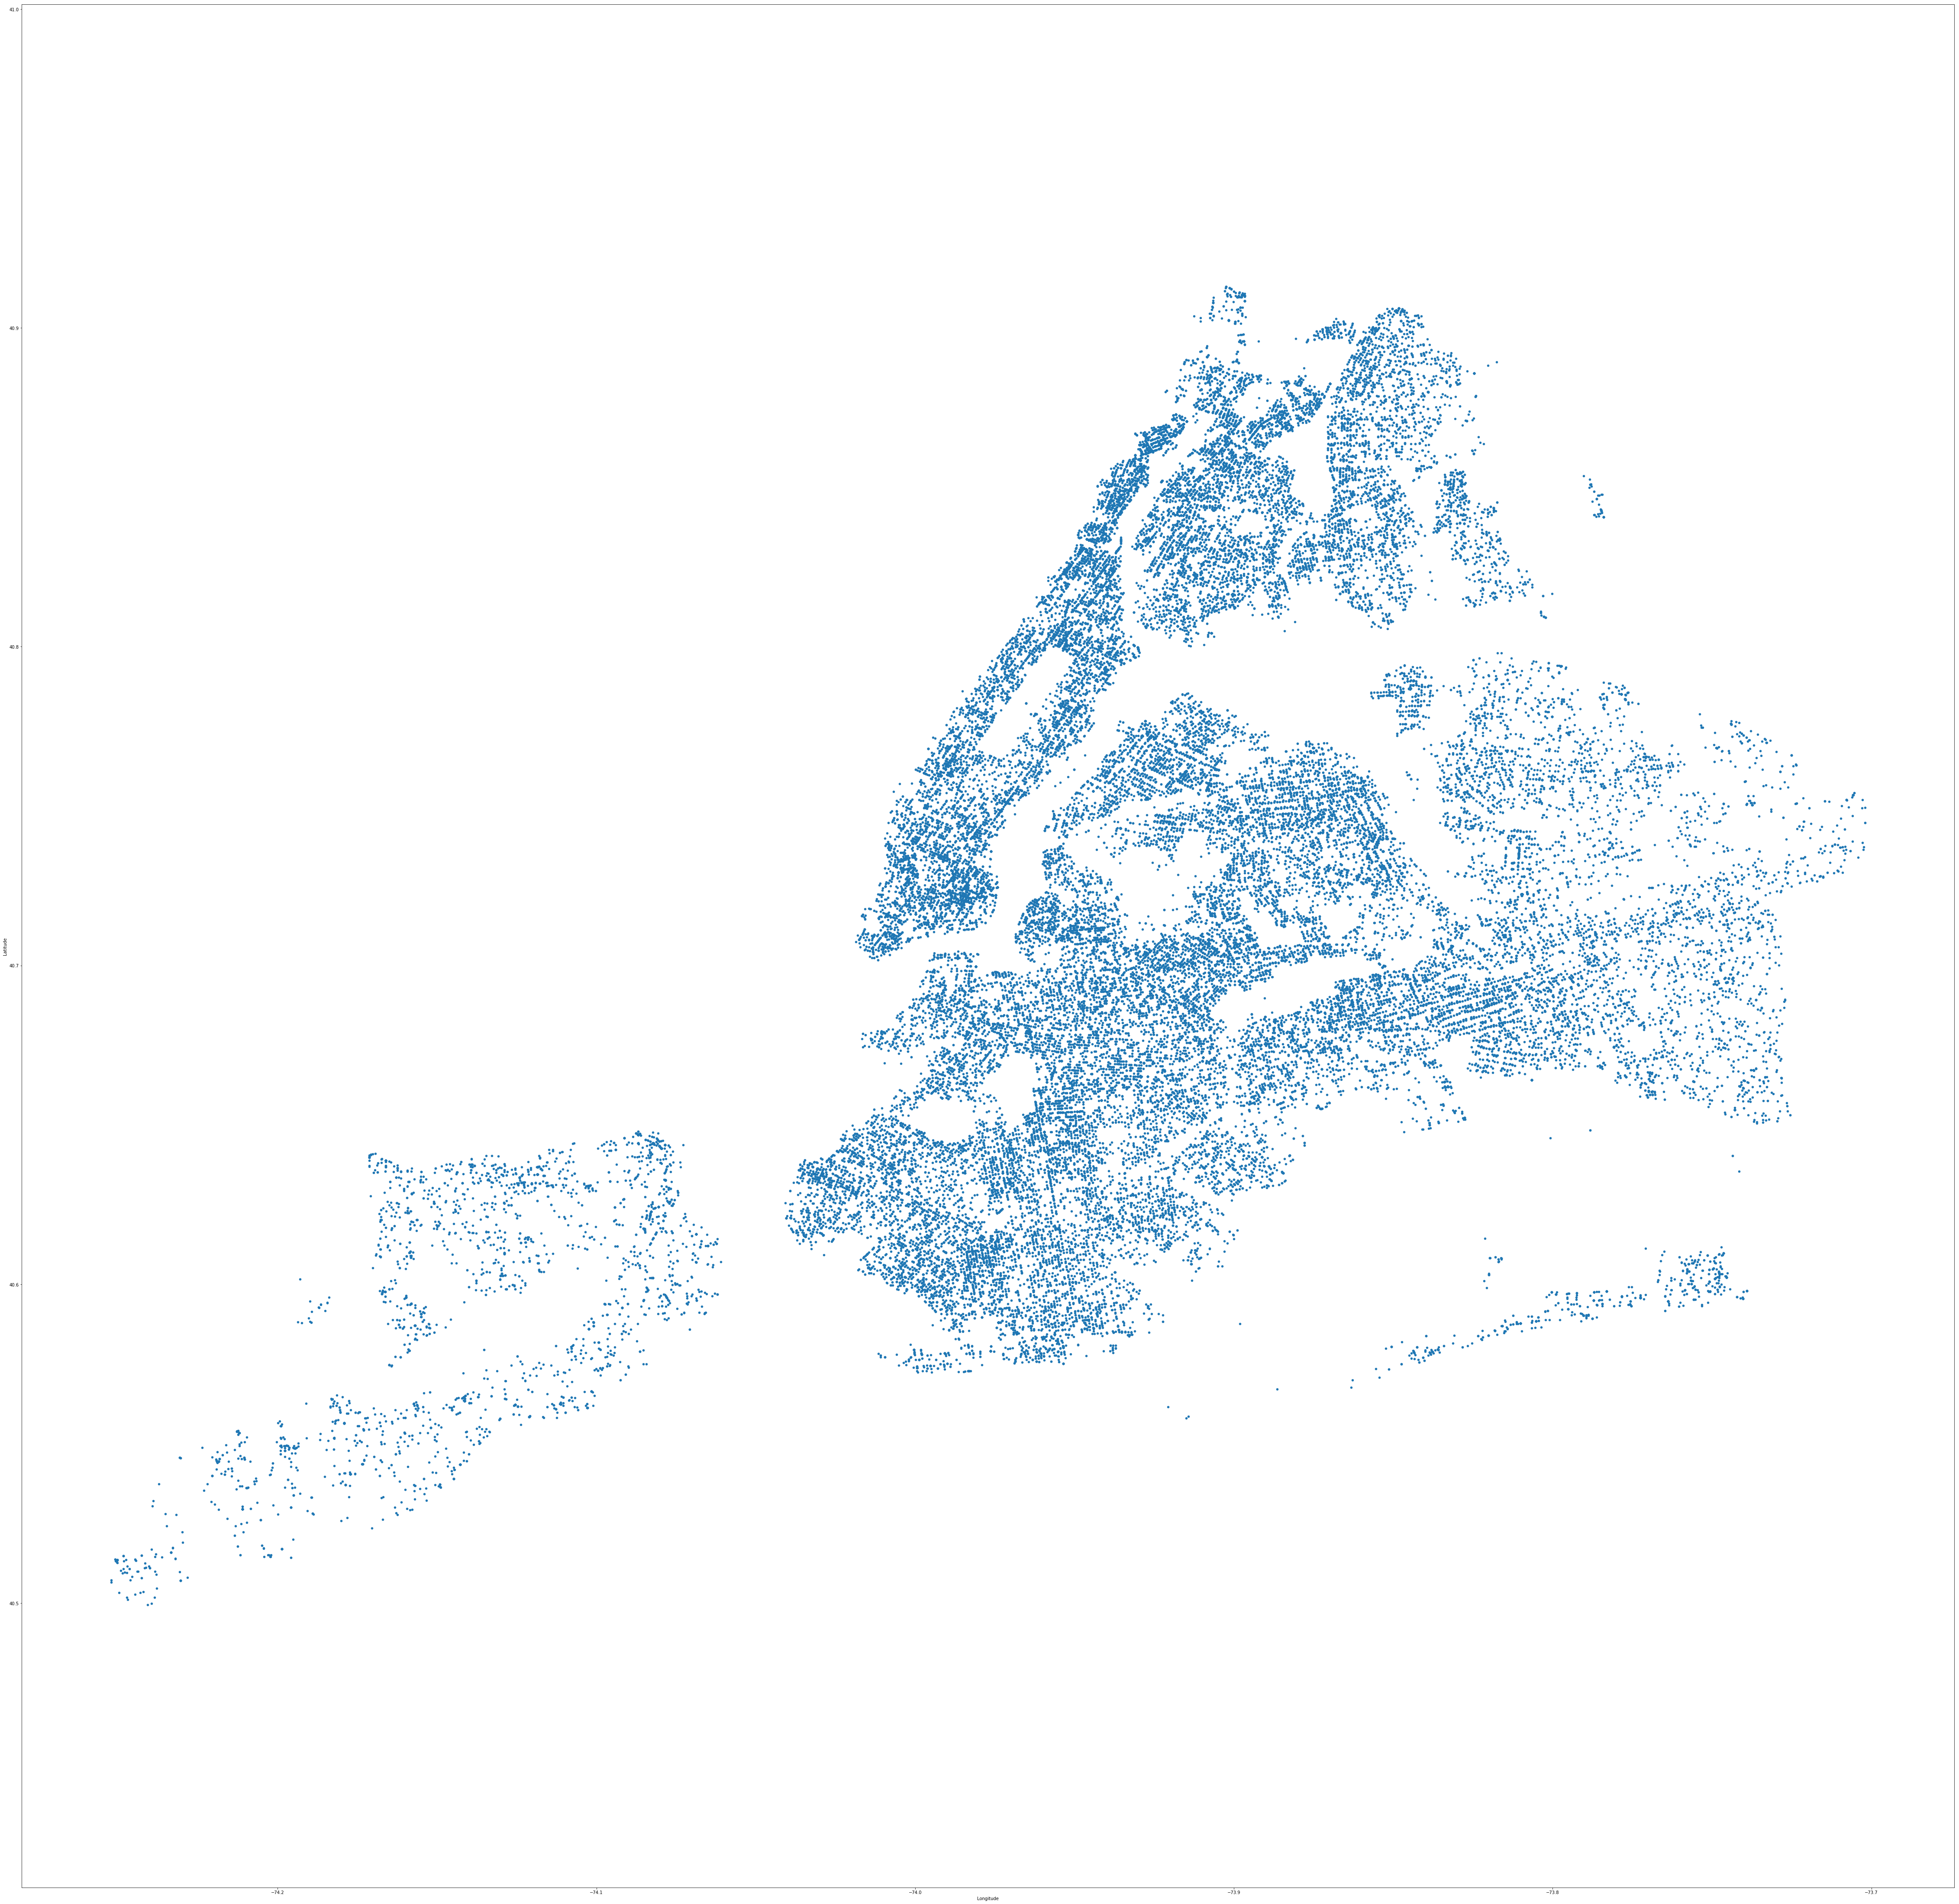

In [4]:
df_nypd[['Longitude', 'Latitude']].plot(kind='scatter',
    x='Longitude', y='Latitude', figsize=(80,80)).axis('equal')

## The Sixth Borough

The first round of data exploration, not included in this file, indicated that there were records in the 311 dataset not belonging to any of the boroughs. These complaints are plotted below. Though there is no immediately apparent pattern, a closer look at the data indicates that many of these complains may be related to issues on the highways that crisscross this city. It would seem that at least some 311 operators are not treating these areas as part of any particular borough, perhaps because of their quasi-federal status and for reporting purposes. As the data are quite small, we will not worry about their exclusion further.

(-74.16944471060465, -73.70556631184498, 40.617821746584006, 40.88896791992564)

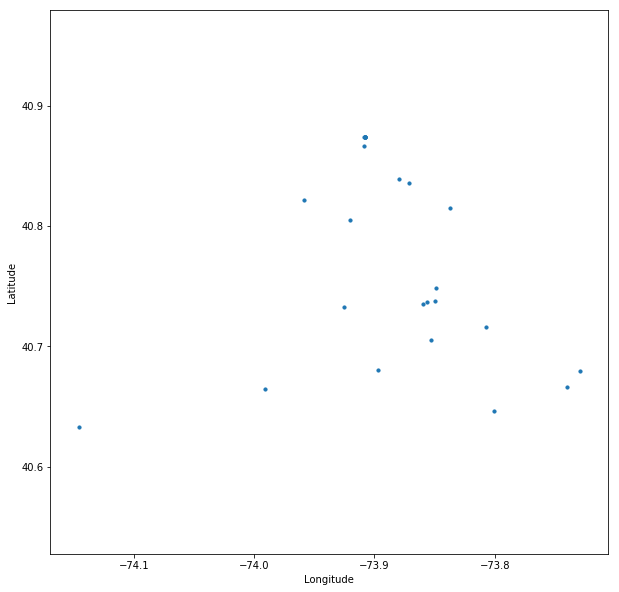

In [5]:
where = df_nypd[df_nypd['Borough'] == 'Unspecified']

where[['Longitude', 'Latitude']].plot(kind='scatter',
    x='Longitude', y='Latitude',s=10, figsize=(10,10)).axis('equal')

## The Boroughs

Returning to the five boroughs, this plot is much like the first, but with added clarity about the boundaries between those boroughs that abut each other. But is the city doing a good job of responding to 311 calls, and how are they doing in each borough?

(-74.28043344403495, -73.67408576857657, 40.4779413390736, 40.93426274462533)

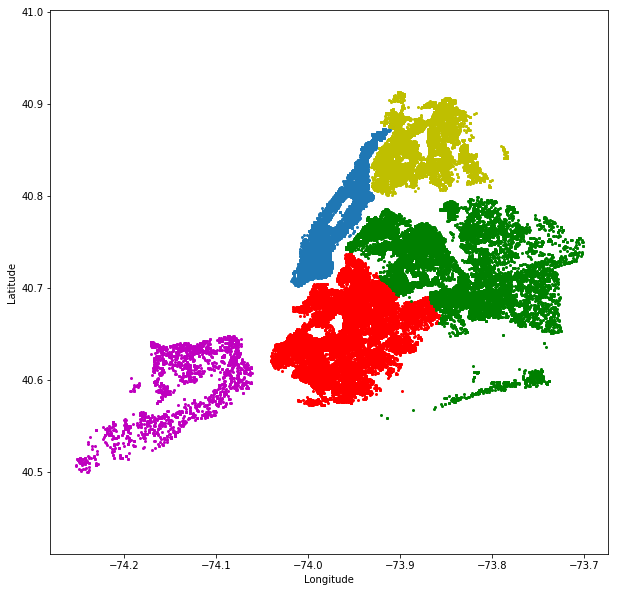

In [6]:
f, ax = plt.subplots()
df_manhattan[['Longitude', 'Latitude']].plot(s=4, kind='scatter', x='Longitude', y='Latitude', ax=ax, figsize=(10,10)).axis('equal')
df_brooklyn[['Longitude', 'Latitude']].plot(s=4, kind='scatter', ax=ax, x='Longitude', y='Latitude', color='r', figsize=(10,10)).axis('equal')
df_queens[['Longitude', 'Latitude']].plot(s=4, kind='scatter', ax=ax, x='Longitude', y='Latitude', color='g', figsize=(10,10)).axis('equal')
df_bronx[['Longitude', 'Latitude']].plot(s=4, kind='scatter', ax=ax, x='Longitude', y='Latitude', color='y', figsize=(10,10)).axis('equal')
df_staten_island[['Longitude', 'Latitude']].plot(s=4, kind='scatter', ax=ax, x='Longitude', y='Latitude', color='m', figsize=(10,10)).axis('equal')

## 25 Days

The map below shows 311 calls that were still not closed after 25 days in red. The value 25 was chosen arbitrarily as "much too long." Some patterns immediately stand out. In Manhattan Washington Heights and Stuyvesant Town blush with the poor response times. The Grand Concourse area of The Bronx and the neighborhood east of Bronx Park seem to suffer from poor response times. Queens and Brooklyn are somewhat less afflicted, but Staten Island has a clear rash affecting its north shore.

(-74.279952123624, -73.67419302665034, 40.4784107637488, 40.93386198808676)

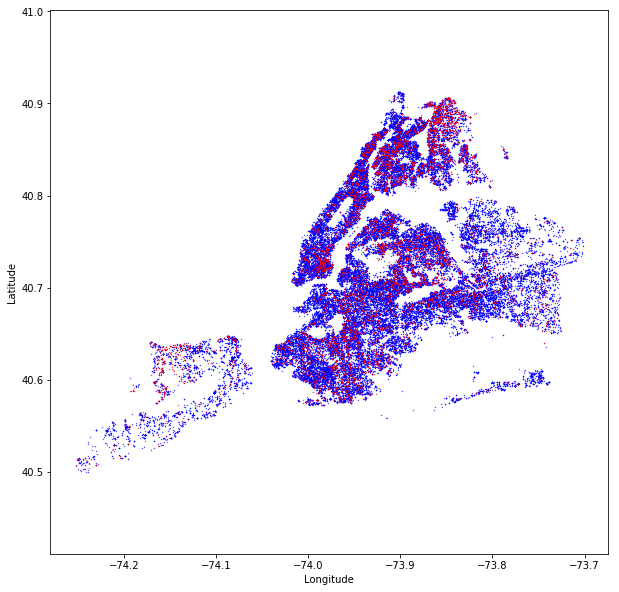

In [7]:
f, ax = plt.subplots()

days = 25

df_nypd[df_nypd['Response Time'].dt.days < days][['Longitude', 'Latitude']].plot(kind='scatter',
    x='Longitude', y='Latitude',ax=ax, color='b', s=.1, figsize=(10,10)).axis('equal')
df_nypd[df_nypd['Response Time'].dt.days > days][['Longitude', 'Latitude']].plot(kind='scatter',
    x='Longitude', y='Latitude',ax=ax, color='r', s=.1, figsize=(10,10)).axis('equal')

## Staten Island's Challenge

A closer look reveals that Staten Island may be experiencing significantly slower responses from 311, but given the limited number of calls the borough has a significantly larger standard deviation.

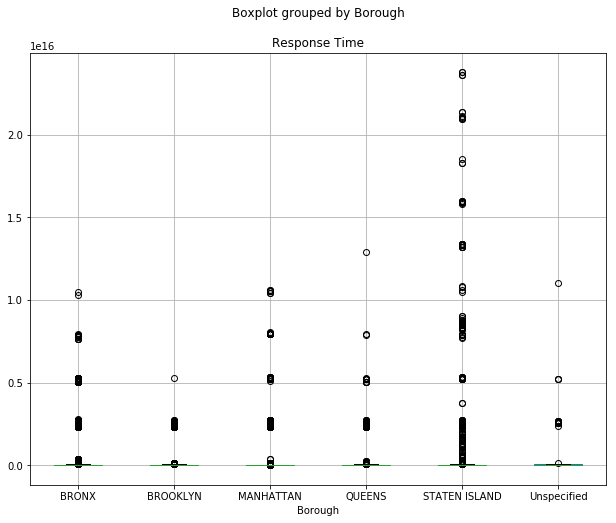

In [8]:
df_nypd.boxplot(column=['Response Time'], by='Borough', figsize=(10,8))

In [9]:
df_nypd['Response Time'].describe()

count                      83647
mean      3 days 05:05:36.087988
std      10 days 09:17:24.138504
min              0 days 00:02:35
25%       0 days 01:19:04.500000
50%              0 days 02:54:39
75%              0 days 06:11:35
max            274 days 23:31:23
Name: Response Time, dtype: object

In [10]:
print("The Bronx", "\n",  df_bronx['Response Time'].describe(),
      "\n", "\n", "Brooklyn", "\n", df_brooklyn['Response Time'].describe(),
      "\n", "\n", "Manhattan", "\n", df_manhattan['Response Time'].describe(),
      "\n", "\n", "Queens", "\n", df_queens['Response Time'].describe(), "\n", "\n",
      "Staten Island", "\n", df_staten_island['Response Time'].describe())

The Bronx 
 count                      15586
mean      4 days 11:34:39.531502
std      11 days 08:57:45.368101
min              0 days 00:03:09
25%              0 days 01:49:00
50%       0 days 04:10:22.500000
75%       0 days 09:23:50.500000
max            121 days 10:17:25
Name: Response Time, dtype: object 
 
 Brooklyn 
 count                     26273
mean     2 days 16:02:01.664750
std      8 days 06:15:18.464247
min             0 days 00:02:59
25%             0 days 01:18:36
50%             0 days 02:47:48
75%             0 days 05:43:47
max            61 days 04:59:58
Name: Response Time, dtype: object 
 
 Manhattan 
 count                     15210
mean     2 days 15:15:09.212820
std      9 days 04:30:12.364073
min             0 days 00:02:35
25%      0 days 01:00:41.250000
50%             0 days 02:12:12
75%             0 days 04:30:15
max           122 days 21:46:14
Name: Response Time, dtype: object 
 
 Queens 
 count                     23263
mean     2 days 18:56:16.989597

## 311 Waiting by Borough

The set of three graphs that follow aim to highlight how the city differentially closes 311 calls after 29, 30, and 45 days. The choice of 29 and 30 days was made to highlight a policy that the city appears to be following that many New Yorkers may not be aware of. It is evident that after 30 days 311 closes many complaints, though not all. The third plot indicated that a complaint that is not closed in 30 days is unlikely to see much progress. As this data only encompasses 2019, a further analysis would be needed to determine if there are other thresholds beyond which the city automatically closes complaints, or if there is a complaint graveyard that experiences permanent inactivity.

(-74.27795751888888, -73.67829499402865, 40.48660151500911, 40.93076355189515)

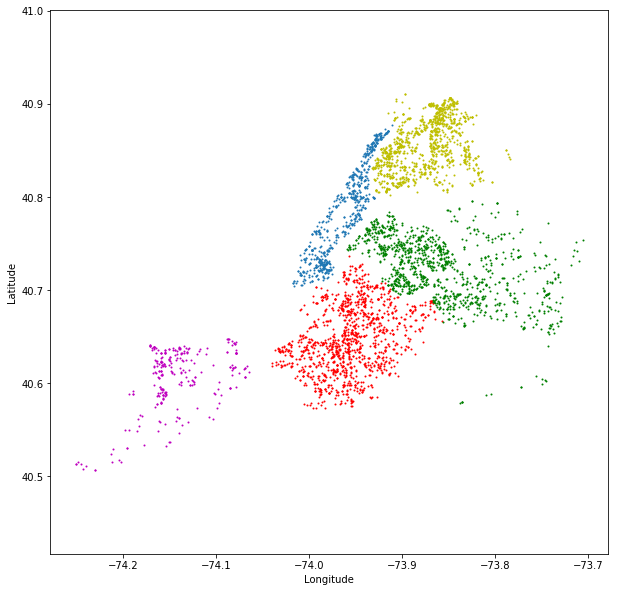

In [11]:
f, ax = plt.subplots()

days = 29

df_manhattan[df_manhattan['Response Time'].dt.days > days][['Longitude', 'Latitude']].plot(s=1, kind='scatter', x='Longitude', y='Latitude', ax=ax, figsize=(10,10)).axis('equal')
df_brooklyn[df_brooklyn['Response Time'].dt.days > days][['Longitude', 'Latitude']].plot(s=1, kind='scatter', ax=ax, x='Longitude', y='Latitude', color='r', figsize=(10,10)).axis('equal')
df_queens[df_queens['Response Time'].dt.days > days][['Longitude', 'Latitude']].plot(s=1, kind='scatter', ax=ax, x='Longitude', y='Latitude', color='g', figsize=(10,10)).axis('equal')
df_bronx[df_bronx['Response Time'].dt.days > days][['Longitude', 'Latitude']].plot(s=1, kind='scatter', ax=ax, x='Longitude', y='Latitude', color='y', figsize=(10,10)).axis('equal')
df_staten_island[df_staten_island['Response Time'].dt.days > days][['Longitude', 'Latitude']].plot(s=1, kind='scatter', ax=ax, x='Longitude', y='Latitude', color='m', figsize=(10,10)).axis('equal')

(-74.21701639763357, -73.71022366216137, 40.54014193191458, 40.92385427966893)

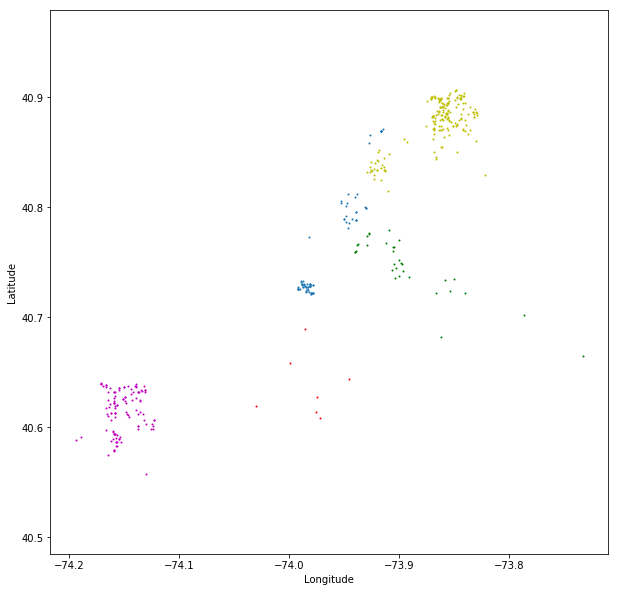

In [12]:
f, ax = plt.subplots()

days = 30

df_manhattan[df_manhattan['Response Time'].dt.days > days][['Longitude', 'Latitude']].plot(s=1, kind='scatter', x='Longitude', y='Latitude', ax=ax, figsize=(10,10)).axis('equal')
df_brooklyn[df_brooklyn['Response Time'].dt.days > days][['Longitude', 'Latitude']].plot(s=1, kind='scatter', ax=ax, x='Longitude', y='Latitude', color='r', figsize=(10,10)).axis('equal')
df_queens[df_queens['Response Time'].dt.days > days][['Longitude', 'Latitude']].plot(s=1, kind='scatter', ax=ax, x='Longitude', y='Latitude', color='g', figsize=(10,10)).axis('equal')
df_bronx[df_bronx['Response Time'].dt.days > days][['Longitude', 'Latitude']].plot(s=1, kind='scatter', ax=ax, x='Longitude', y='Latitude', color='y', figsize=(10,10)).axis('equal')
df_staten_island[df_staten_island['Response Time'].dt.days > days][['Longitude', 'Latitude']].plot(s=1, kind='scatter', ax=ax, x='Longitude', y='Latitude', color='m', figsize=(10,10)).axis('equal')

(-74.21226218736257, -73.81079332273576, 40.561612331118226, 40.92311350325085)

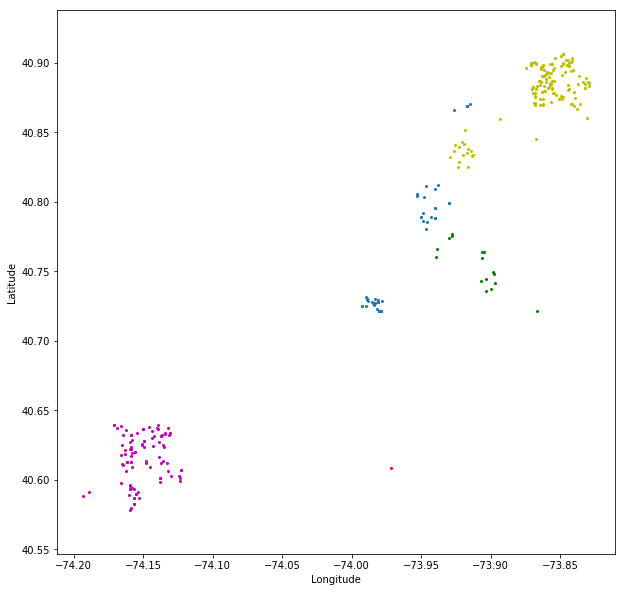

In [13]:
f, ax = plt.subplots()

days = 45

df_manhattan[df_manhattan['Response Time'].dt.days > days][['Longitude', 'Latitude']].plot(s=4, kind='scatter', x='Longitude', y='Latitude', ax=ax, figsize=(10,10)).axis('equal')
df_brooklyn[df_brooklyn['Response Time'].dt.days > days][['Longitude', 'Latitude']].plot(s=4, kind='scatter', ax=ax, x='Longitude', y='Latitude', color='r', figsize=(10,10)).axis('equal')
df_queens[df_queens['Response Time'].dt.days > days][['Longitude', 'Latitude']].plot(s=4, kind='scatter', ax=ax, x='Longitude', y='Latitude', color='g', figsize=(10,10)).axis('equal')
df_bronx[df_bronx['Response Time'].dt.days > days][['Longitude', 'Latitude']].plot(s=4, kind='scatter', ax=ax, x='Longitude', y='Latitude', color='y', figsize=(10,10)).axis('equal')
df_staten_island[df_staten_island['Response Time'].dt.days > days][['Longitude', 'Latitude']].plot(s=4, kind='scatter', ax=ax, x='Longitude', y='Latitude', color='m', figsize=(10,10)).axis('equal')

## Numerical Take

The above plots beg the question, how do the rates of closure vary by borough? Specifically, for the 29, 30, and 45 day periods, what portion of complaints from each borough is still open? A cursory analysis again highlights Staten Island, but the data still suffer from high variance. Also notable are the high rates in The Bronx. The earlier analysis suggests that many of these calls may be coming from The Grand Concourse area and Pelham.

In [14]:
boroughs = [df_manhattan, df_queens, df_staten_island, df_bronx, df_brooklyn]
Boroughs = ['Manhattan', 'Queens', 'Staten Island', 'The Bronx', 'Brooklyn']

for B, b in zip(Boroughs, boroughs):
    print(round(100 * b[b['Response Time'].dt.days > 29].size/b[b['Response Time'].dt.days >= 0].size, 3),
          round(100 * b[b['Response Time'].dt.days > 30].size/b[b['Response Time'].dt.days >= 0].size, 3),
          round(100 * b[b['Response Time'].dt.days > 45].size/b[b['Response Time'].dt.days >= 0].size, 3), "<--", B)

4.556 0.526 0.355 <-- Manhattan
4.896 0.142 0.069 <-- Queens
8.553 3.502 3.006 <-- Staten Island
7.494 1.193 0.937 <-- The Bronx
4.746 0.027 0.004 <-- Brooklyn


## Location Type

Now that we have a handle on which boroughs are contributing 311 complaints and on how the city is responding to those complaints, let's take a moment to briefly dive into where these complaints are coming from with the boroughs. The first chart shows only the top four reported locations, but even with this restriction it is clear that most complaints are coming from residences and the street. Interestingly bars, which many may assume bring the majority of complaints barely register when compared with the modal category.

In the second chart we consider these complaint location types by borough and find some interesting irregularities. Whereas in Queens and Brooklyn complaints come predominantly from the streets and sidewalks, Manhattan and The Bronx have slightly more complaints from residences than from sidewalks, an observation made starker by its contrast with Brooklyn and Queens. The reversal seems to be attributable to the large number of residential complaints in Brooklyn and Queens. Perhaps these boroughs have a cultural connection not shared with the rest of the city.

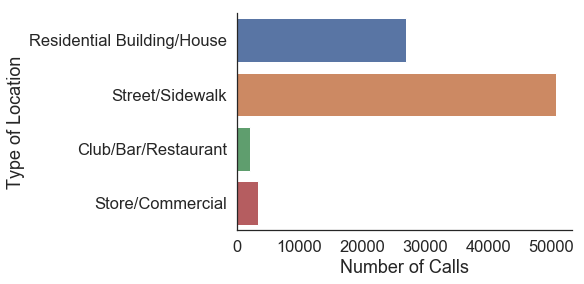

In [15]:
df_locs = df_nypd[df_nypd['Location Type'].isin(['Residential Building/House', 'Street/Sidewalk',
       'Club/Bar/Restaurant', 'Store/Commercial'])]

sns.set(style="white", font_scale=1.5)
# plt.figure(figsize=(10,10))
ax = sns.countplot(y='Location Type', data=df_locs)
ax.set(ylabel='Type of Location', xlabel='Number of Calls')
sns.despine()

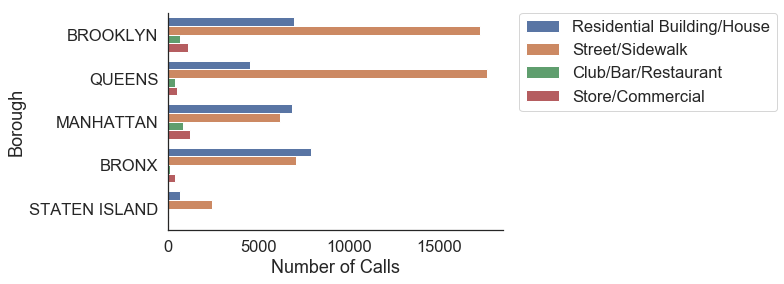

In [16]:
sns.set(style="white", font_scale=1.5)
# plt.figure(figsize=(25,20))
ax = sns.countplot(hue='Location Type', data=df_locs[df_locs['Borough']!='Unspecified'], y='Borough')
ax.set(ylabel='Borough', xlabel='Number of Calls')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

## Future Work
There are two main areas that I would like to explore given more time for this project. 

### Large Data
A major challenge getting started with this project was working with all of the data. It would be interesting to select rows randomly from the data so that a more longitudinal analysis could be possible. We now have a sense of how the city is responding to 311 calls placed in 2019, but how has that changed since 2009, when the city began to collect the data for publication? A random sampling approach should allow for a small enough file to facilitate rapid analytics while still producing low variance results.

### More Features
In working with the 311 data it became apparent that the data available from the city are limited. Transcripts are unavailable making sentiment analysis impossible, and there is no demographic information about callers. How old are they? How long have they been city residents? These and other questions are relevant but impossible to answer. It is not clear at present how this metadata could be added to the existing data, but a randomized survey coupled with machine learning techniques could allow for a partial answer.